In [3]:
'''
BOSTON DATASET - Linear Regression

@Author - Rahul Garg (rahu.garg3@hpe.com)
'''

'\nBOSTON DATASET - Linear Regression\n\n@Author - Rahul Garg (rahu.garg3@hpe.com)\n'

In [66]:
#Importing Required Modules
import os,sys
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
%matplotlib inline

In [67]:
boston=load_boston()
df_bos=pd.DataFrame(boston.data,columns=list(boston.feature_names))

In [68]:
df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
df_bos['Price']=list(boston.target)

In [70]:
df_bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [71]:
#Boston Dataset Description
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [72]:
print(df_bos.shape)

(506, 14)


In [73]:
print(df_bos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.4 KB
None


**No NULL Values are present in boston dataset.**

In [74]:
df_bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


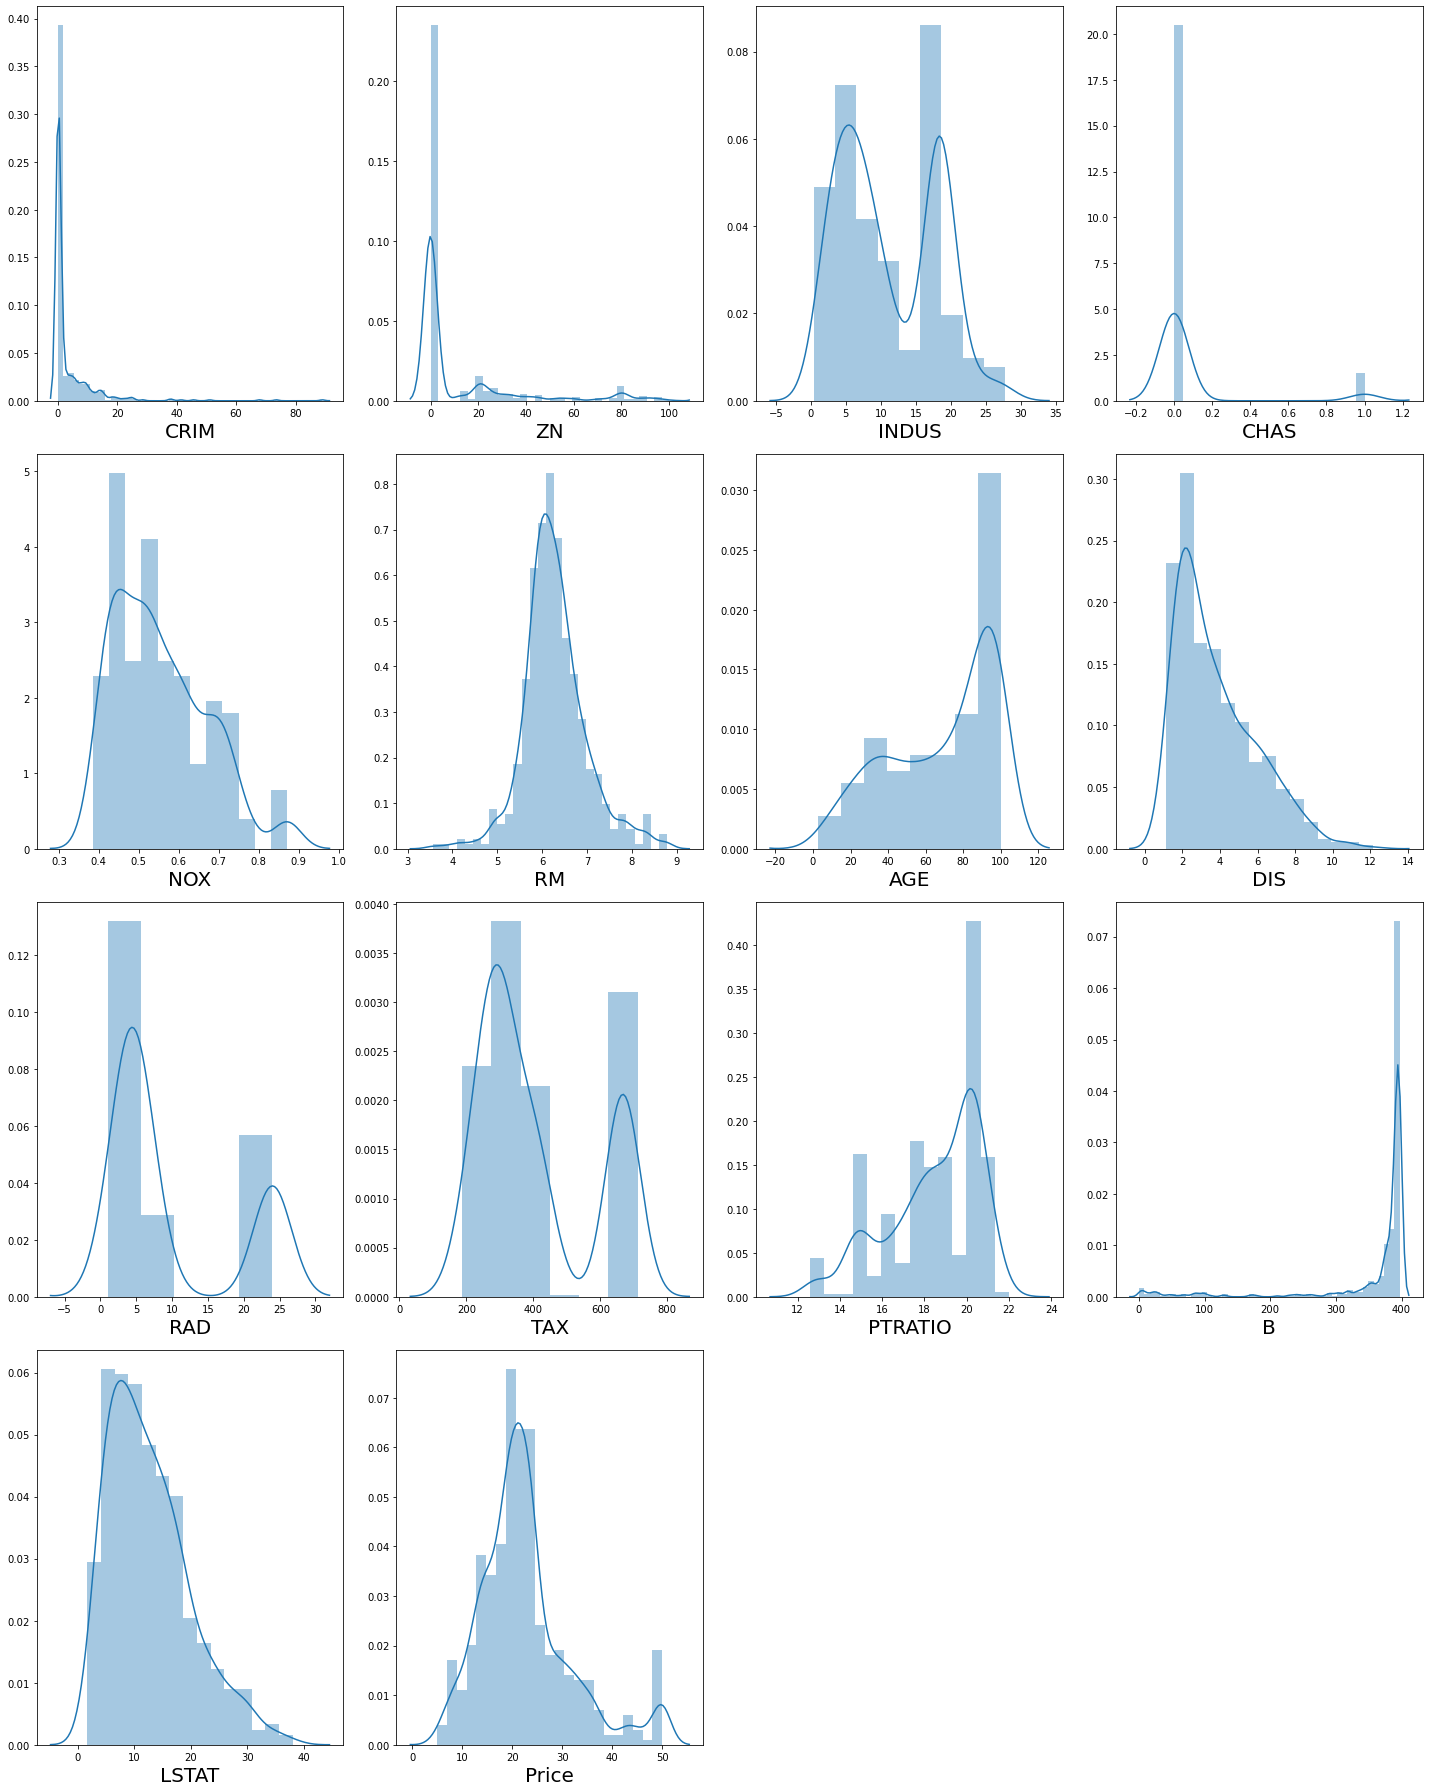

In [75]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df_bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df_bos[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Skewness is observed in many features let us visualize if any outliers are present**

"plt.figure(figsize=(15,10), facecolor='white')\ndf_bos.boxplot()"

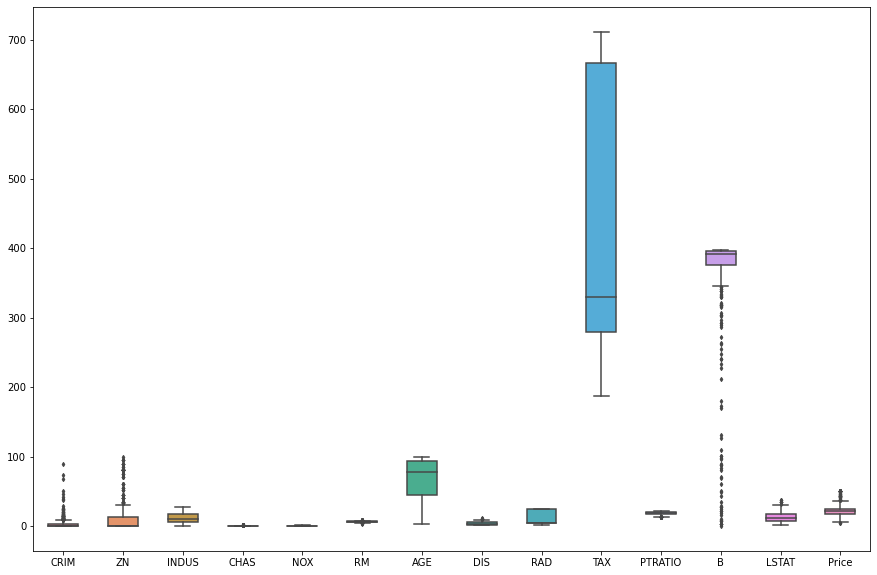

In [76]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df_bos, width= 0.5,ax=ax,  fliersize=3)
'''plt.figure(figsize=(15,10), facecolor='white')
df_bos.boxplot()'''

**Outliers are observed in the dataset as can be seen in boxplot**

In [77]:
df_bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [78]:
#Handling Outliers
q = df_bos['CRIM'].quantile(0.98)
data_cleaned = df_bos[df_bos['CRIM']<q]

q = data_cleaned['ZN'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['ZN']<q]

q = data_cleaned['INDUS'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['INDUS']<q]

q = data_cleaned['CHAS'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['CHAS']<q]

q = data_cleaned['B'].quantile(0.95)
data_cleaned  = data_cleaned[data_cleaned['B']<q]

q = data_cleaned['LSTAT'].quantile(0.98)
data_cleaned  = data_cleaned[data_cleaned['LSTAT']<q]

q = data_cleaned['PTRATIO'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['PTRATIO']<q]

q = data_cleaned['DIS'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['DIS']<q]

q = data_cleaned['AGE'].quantile(0.99)
data_cleaned  = data_cleaned[data_cleaned['AGE']<q]

c:\users\garahul\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


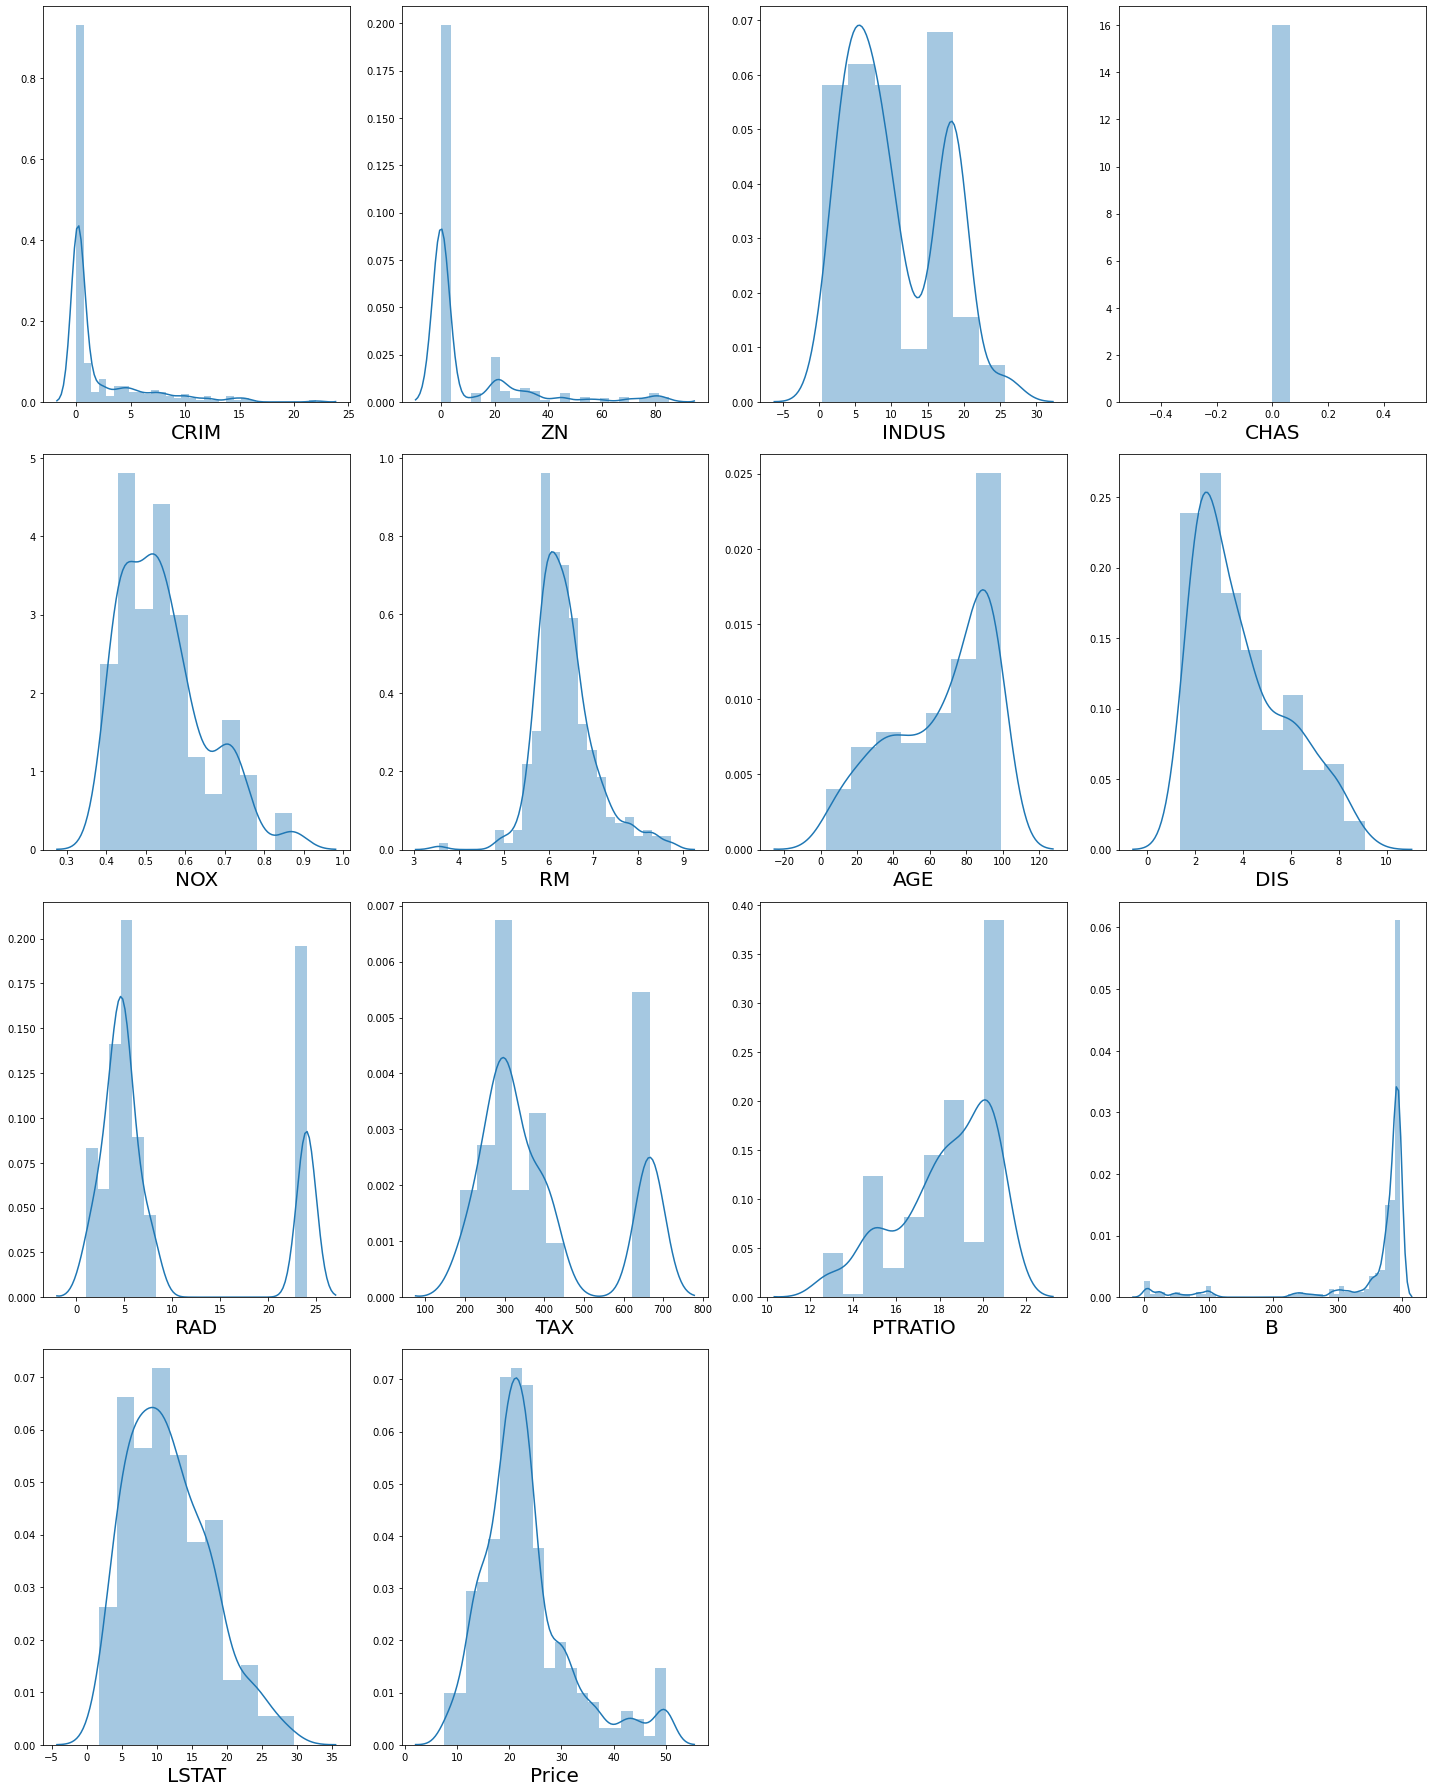

In [79]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data_cleaned:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data_cleaned[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [80]:
data_cleaned.shape

(287, 14)

In [85]:
y = df_bos['Price']
X =df_bos.drop(columns = ['Price'])

'''y=data_cleaned['Price']
X=data_cleaned.drop(columns=['Price'])'''

"y=data_cleaned['Price']\nX=data_cleaned.drop(columns=['Price'])"

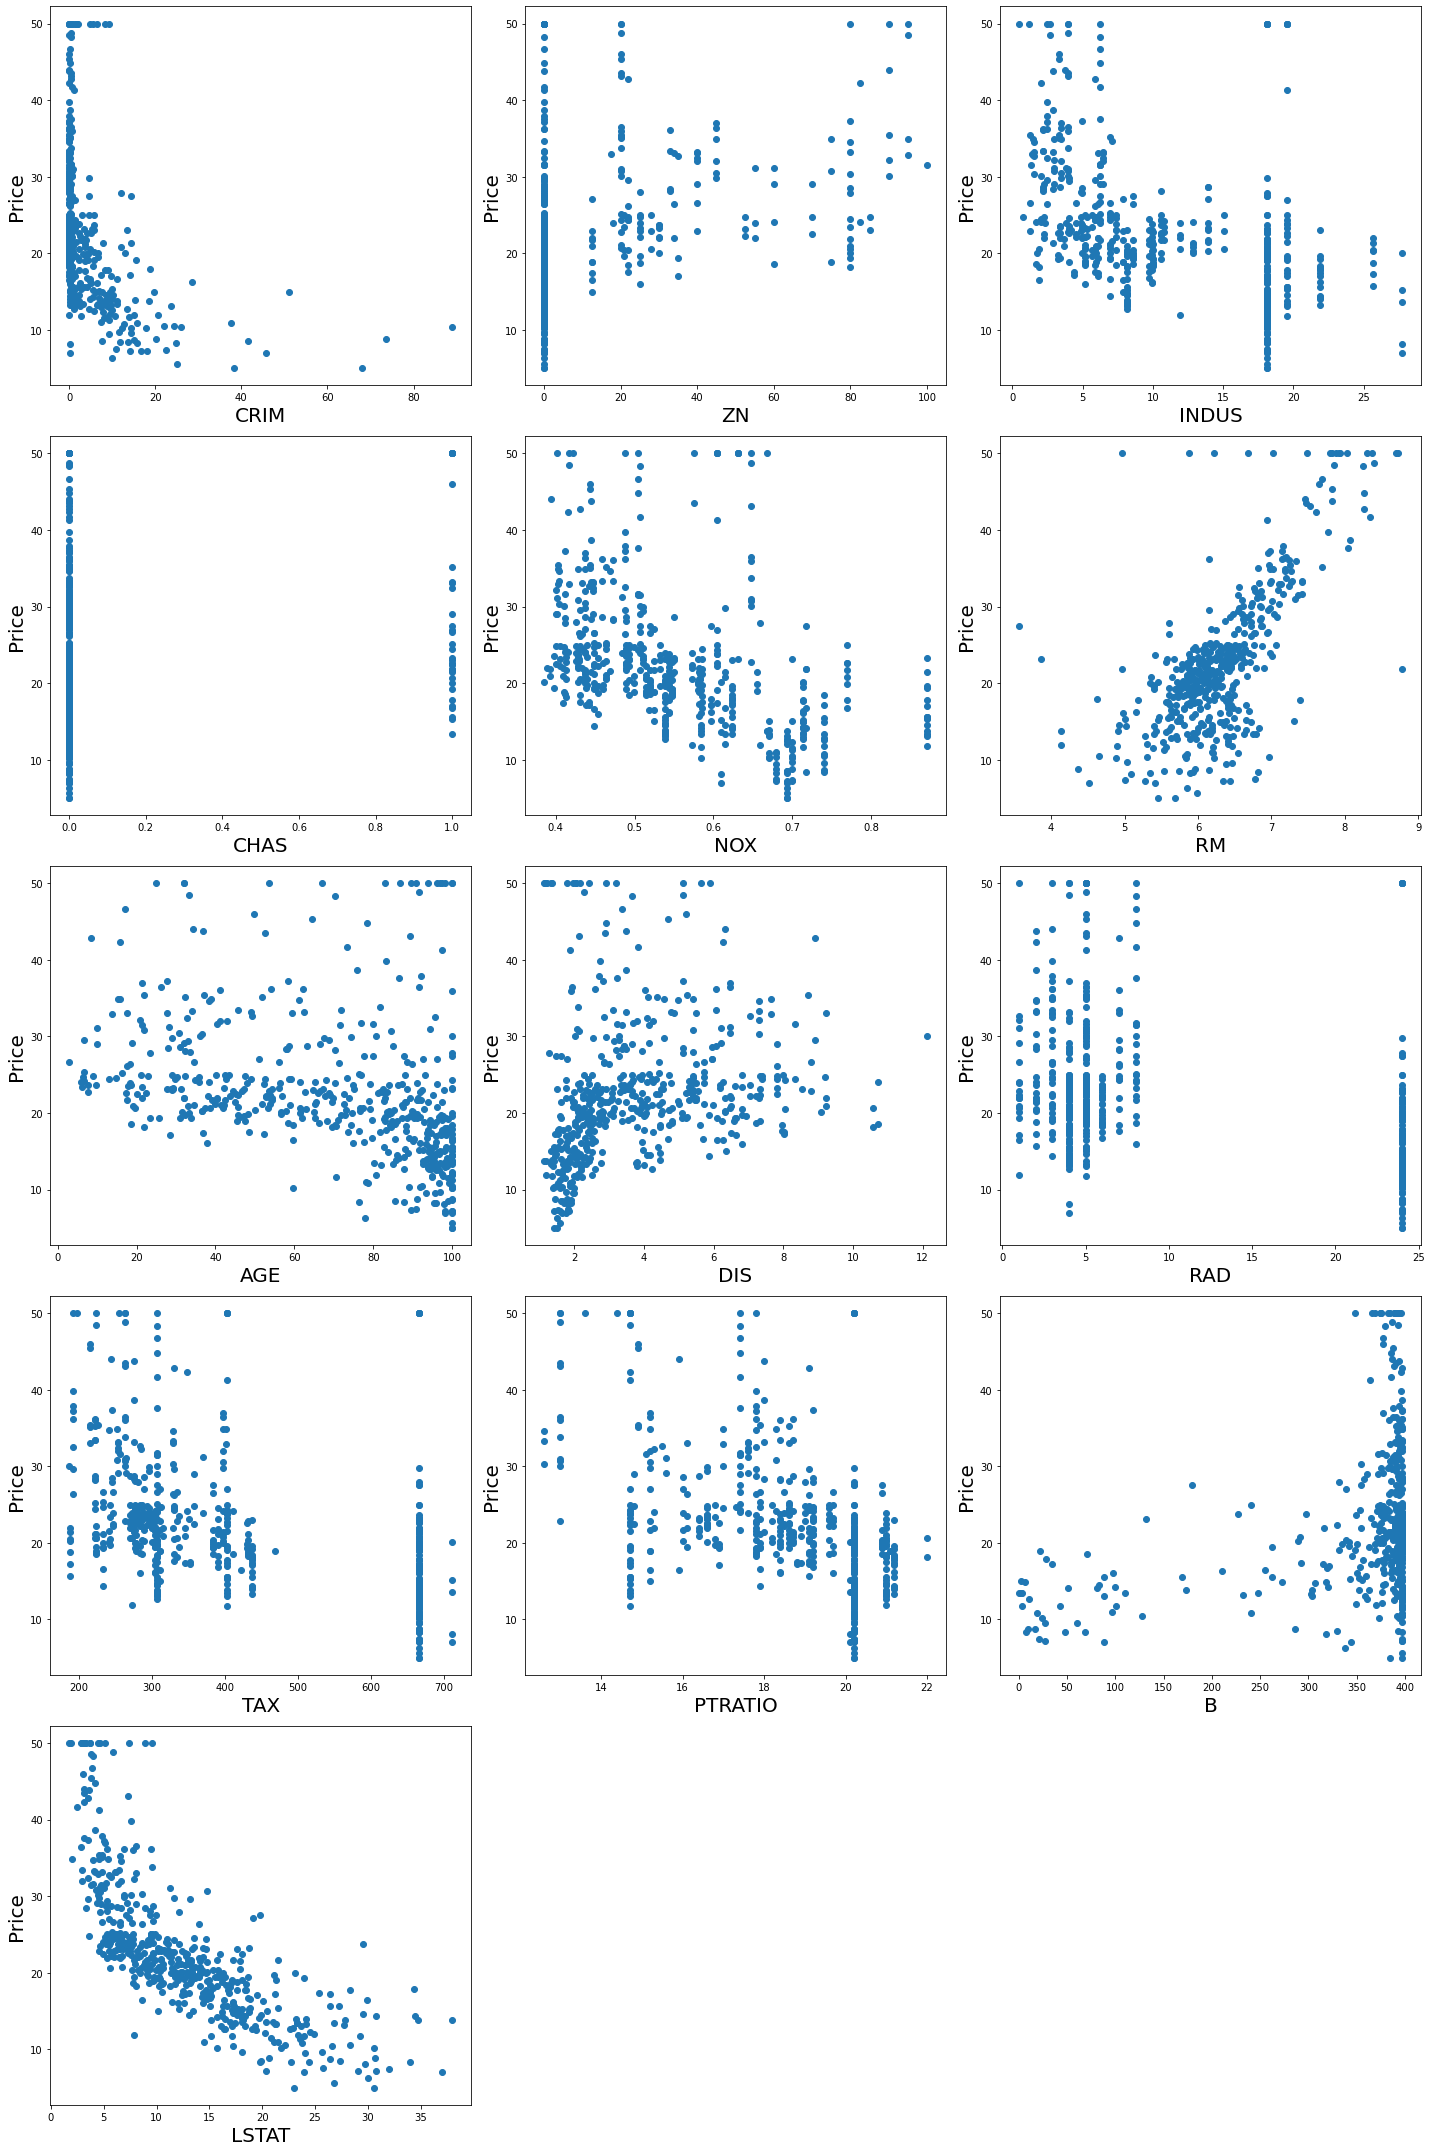

In [86]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Price',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [88]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [89]:
#Scaling the features
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [92]:
vif.sort_values(by='VIF')

,VIF,Features
3,1.073995,CHAS
11,1.348521,B
0,1.792192,CRIM
10,1.799084,PTRATIO
5,1.933744,RM
1,2.298758,ZN
12,2.941491,LSTAT
6,3.100826,AGE
7,3.955945,DIS
2,3.991596,INDUS


**As 5 is the VIF threshold value for features hence we see RAD and TAX columns have high multicollinearity.**

<AxesSubplot:>

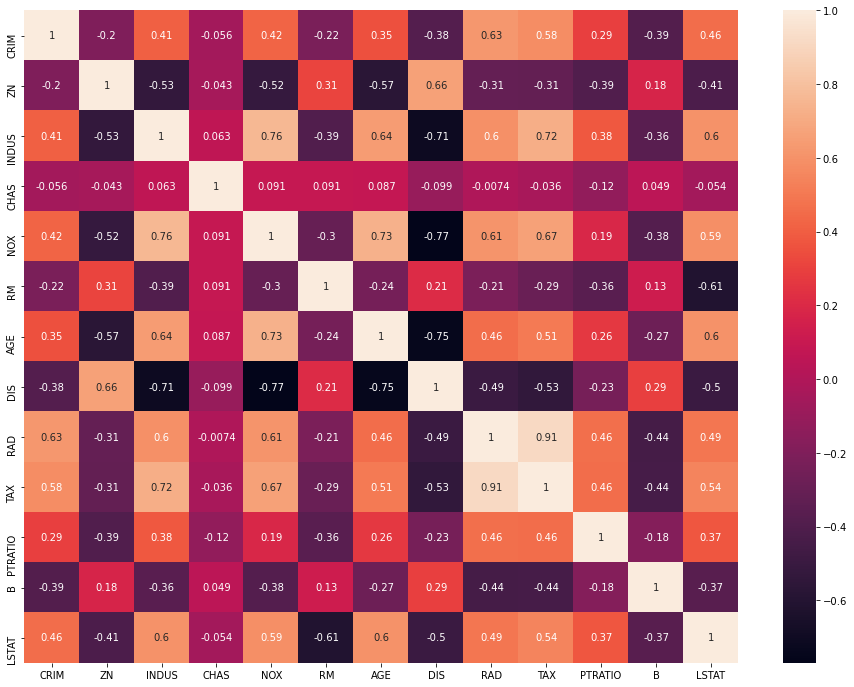

In [95]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True)

Our target variable, seems to be highly correlated, with LSTAT and RM, which makes sense, as these two are very important factors for house pricing, but there seems to be a lot of multicollinearity as well.

The issue here is, that there is a lot of collinearity between our predictor variables, for example DIS is highly correlated to INUDS, INOX and AGE.

This is not good, as multicollinearity can make our model unstable, we need to look at it a little more, before modeling our data, I have explained, the probem of multicollinearity below.

In [96]:
#Applying PCA to remove the collinearily between the data

In [97]:
from sklearn.decomposition import PCA

In [99]:
pca=PCA(n_components=13)

In [100]:
X_pca=pca.fit_transform(X)

In [101]:
X_pca

array([[-1.19818843e+02, -5.56005586e+00, -3.17269264e+00, ...,
         3.78374287e-01, -7.13108946e-02,  3.35451015e-02],
       [-1.68890155e+02,  1.01162086e+01, -3.07818868e+01, ...,
         4.86740794e-02, -9.47343278e-02, -3.31502751e-02],
       [-1.69311707e+02,  1.40805323e+01, -1.67536282e+01, ...,
        -4.67469154e-01, -1.07257460e-01, -4.50902543e-03],
       ...,
       [-1.38387163e+02,  9.38092201e-01, -3.72851813e+01, ...,
        -2.97952531e-01, -1.04654969e-01,  4.30883930e-02],
       [-1.37505173e+02,  4.25182510e+00, -3.59883419e+01, ...,
        -1.94149871e-01, -9.54593524e-02,  4.51072934e-02],
       [-1.39190333e+02,  1.00906423e+00, -2.97724323e+01, ...,
         4.16189839e-01, -7.03283698e-02,  4.55682936e-02]])

###### Checking Multicollinearity after PCA using VIF and HeatMap

In [103]:
variables = X_pca
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [104]:
vif.sort_values(by='VIF')

,VIF,Features
10,1.0,PTRATIO
11,1.0,B
0,1.0,CRIM
1,1.0,ZN
2,1.0,INDUS
5,1.0,RM
6,1.0,AGE
7,1.0,DIS
8,1.0,RAD
9,1.0,TAX


In [106]:
df_pca=pd.DataFrame(X_pca,columns=list(X.columns))

<AxesSubplot:>

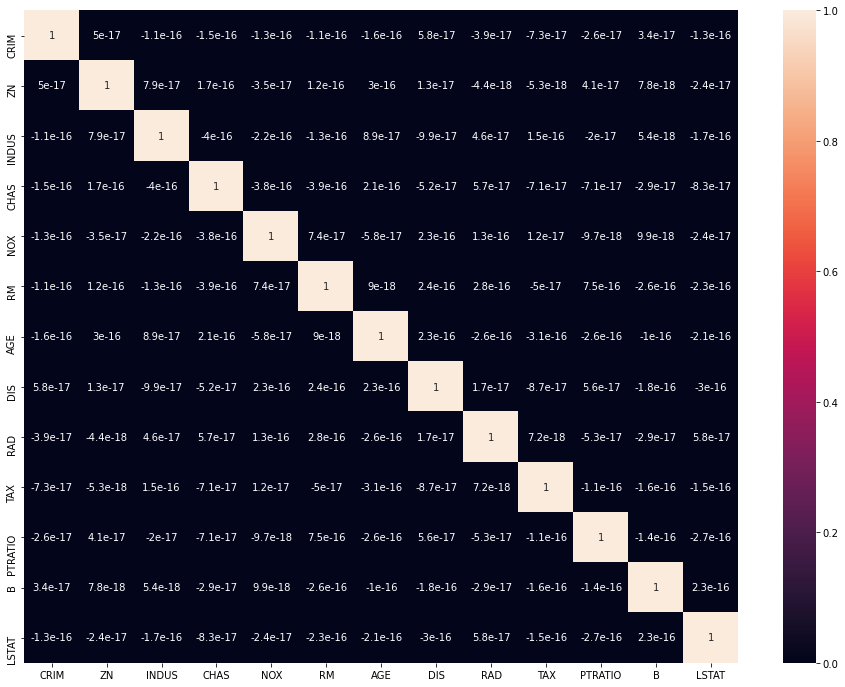

In [112]:
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_pca.corr(),annot=True)

In [113]:
df_pca

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-119.818843,-5.560056,-3.172693,5.291593,-1.818728,-6.312070,-1.032609,5.477971,-1.935498,-0.329154,0.378374,-0.071311,0.033545
1,-168.890155,10.116209,-30.781887,1.296776,0.369680,-3.241821,-0.628651,0.915626,0.467686,1.299810,0.048674,-0.094734,-0.033150
2,-169.311707,14.080532,-16.753628,-10.278399,-0.093409,-5.910068,1.718753,0.510026,0.414966,0.910646,-0.467469,-0.107257,-0.004509
3,-190.230642,18.302463,-6.534195,-19.644921,1.513442,-6.959925,-1.971382,0.845947,1.063487,0.964424,-0.276214,-0.052466,0.043716
4,-190.133451,16.097947,-13.158520,-14.178141,1.761005,-5.760987,-3.059650,1.032843,1.062885,1.123178,-0.538077,-0.055400,0.035538
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-138.697933,5.781485,-20.978012,-5.706647,-0.480929,0.145623,3.776814,0.333697,2.909919,-1.690514,-0.322279,-0.063431,0.059858
502,-139.504439,1.039389,-26.794150,-0.878985,-0.897763,-1.145200,3.795357,0.434186,3.104086,-1.639706,0.238205,-0.065791,0.045959
503,-138.387163,0.938092,-37.285181,8.073690,-2.368902,-5.829921,4.696785,0.604877,3.628018,-1.349502,-0.297953,-0.104655,0.043088
504,-137.505173,4.251825,-35.988342,7.016434,-2.102859,-4.911739,4.428370,0.624099,3.590587,-1.188895,-0.194150,-0.095459,0.045107


##### Linear Regression Application

In [114]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.25,random_state=355)

In [116]:
x_train.shape

(379, 13)

In [117]:
x_test.shape

(127, 13)

In [118]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [121]:
print('Coeff Values: ',regression.coef_)
print('Intercept Value: ',regression.intercept_)

Coeff Values:  [-2.52051940e-02 -7.68651599e-03  7.19116339e-02  4.41728011e-02
 -2.20021733e-01 -8.13427545e-01  1.86247037e-01 -3.20614939e-01
 -1.21547311e+00 -1.30135645e+00 -4.49148013e+00  3.52503055e+00
 -1.71830561e+01]
Intercept Value:  22.50722857528611


In [128]:
from sklearn.metrics import mean_squared_error,r2_score

In [126]:
#Training model on training data and predicting on training data
y_pred=regression.predict(x_train)
print(y_train.to_list())
print(list(y_pred))

[31.6, 11.3, 14.5, 24.5, 41.3, 16.3, 7.2, 50.0, 21.2, 22.9, 22.0, 19.5, 13.0, 48.8, 27.5, 21.7, 17.8, 19.1, 18.5, 8.5, 19.1, 13.8, 15.7, 9.5, 19.5, 27.5, 17.5, 14.0, 34.9, 26.4, 33.0, 14.8, 16.6, 21.7, 6.3, 22.6, 24.8, 19.4, 14.2, 13.8, 35.1, 11.8, 30.1, 42.8, 17.5, 22.7, 10.5, 17.8, 21.9, 25.0, 19.3, 17.8, 23.1, 23.0, 50.0, 21.4, 5.0, 29.0, 19.0, 23.1, 19.6, 50.0, 21.2, 43.8, 17.9, 22.4, 21.0, 18.4, 36.4, 25.0, 30.1, 25.0, 12.7, 13.6, 10.5, 41.7, 20.2, 20.8, 14.1, 12.5, 29.4, 50.0, 23.2, 32.5, 21.6, 11.7, 10.8, 50.0, 21.8, 19.7, 16.5, 25.3, 18.3, 17.2, 20.7, 28.6, 22.0, 16.5, 16.1, 24.8, 8.5, 32.4, 19.0, 23.7, 8.1, 15.6, 37.6, 43.5, 20.4, 21.5, 18.8, 16.8, 18.7, 23.4, 23.9, 20.1, 32.7, 15.1, 18.2, 21.7, 24.7, 24.3, 22.6, 50.0, 14.6, 21.0, 21.1, 22.5, 35.4, 21.5, 23.9, 17.6, 11.0, 8.7, 22.5, 20.9, 22.1, 16.2, 27.5, 22.0, 22.0, 13.2, 18.9, 17.8, 14.6, 7.5, 25.0, 18.6, 17.4, 13.4, 24.4, 8.8, 19.6, 20.0, 34.9, 33.4, 29.8, 33.3, 13.3, 28.1, 46.7, 24.4, 23.2, 20.4, 31.2, 24.3, 23.1, 22.0, 1

In [131]:
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R2 Score: ', r2)
print('Root Mean Sq Score: ',rmse)

R2 Score:  0.730647531347494
Root Mean Sq Score:  4.720391098867944


In [134]:
#Training model on training data and predicting on test data
y_pred=regression.predict(x_test)
print(y_train.to_list())
print(list(y_pred))
r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score: ', r2)
print('Root Mean Sq Score: ',rmse)

[31.6, 11.3, 14.5, 24.5, 41.3, 16.3, 7.2, 50.0, 21.2, 22.9, 22.0, 19.5, 13.0, 48.8, 27.5, 21.7, 17.8, 19.1, 18.5, 8.5, 19.1, 13.8, 15.7, 9.5, 19.5, 27.5, 17.5, 14.0, 34.9, 26.4, 33.0, 14.8, 16.6, 21.7, 6.3, 22.6, 24.8, 19.4, 14.2, 13.8, 35.1, 11.8, 30.1, 42.8, 17.5, 22.7, 10.5, 17.8, 21.9, 25.0, 19.3, 17.8, 23.1, 23.0, 50.0, 21.4, 5.0, 29.0, 19.0, 23.1, 19.6, 50.0, 21.2, 43.8, 17.9, 22.4, 21.0, 18.4, 36.4, 25.0, 30.1, 25.0, 12.7, 13.6, 10.5, 41.7, 20.2, 20.8, 14.1, 12.5, 29.4, 50.0, 23.2, 32.5, 21.6, 11.7, 10.8, 50.0, 21.8, 19.7, 16.5, 25.3, 18.3, 17.2, 20.7, 28.6, 22.0, 16.5, 16.1, 24.8, 8.5, 32.4, 19.0, 23.7, 8.1, 15.6, 37.6, 43.5, 20.4, 21.5, 18.8, 16.8, 18.7, 23.4, 23.9, 20.1, 32.7, 15.1, 18.2, 21.7, 24.7, 24.3, 22.6, 50.0, 14.6, 21.0, 21.1, 22.5, 35.4, 21.5, 23.9, 17.6, 11.0, 8.7, 22.5, 20.9, 22.1, 16.2, 27.5, 22.0, 22.0, 13.2, 18.9, 17.8, 14.6, 7.5, 25.0, 18.6, 17.4, 13.4, 24.4, 8.8, 19.6, 20.0, 34.9, 33.4, 29.8, 33.3, 13.3, 28.1, 46.7, 24.4, 23.2, 20.4, 31.2, 24.3, 23.1, 22.0, 1

In [136]:
st_file='stand_scaler.pickle'
pickle.dump(scaler, open(st_file, 'wb'))

In [137]:
# saving the model to the local file system
filename = 'linear_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [144]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [145]:
# best alpha parameter
alpha = lasscv.alpha_
print(alpha)

#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

print(lasso_reg.score(x_test, y_test))

0.00023566421563150474
0.7519176536247909


**After L1 regularization RMS value is same as that of normal Linear Regression. This means our model does not overfit.**

In [146]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

ridge_model.score(x_test, y_test)

0.7510566174329587

**After L2 regularization also RMS value is same as that of normal Linear Regression. This means our model does not overfit.**

In [148]:
# Elastic net
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

print(elasticCV.alpha_)
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
print(elasticCV.l1_ratio)

elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test, y_test)

1.5740233055986073
0.5


0.7115488475279687

**So, we can see by using different type of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.**